# Haberman Dataset EDA

Objective : Survival of patient either patient survived 5year or longer OR died within 5year

### About Dataset :

###### Data Set Description :
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading Haberman Dataset file using PANDAS
haberman = pd.read_csv("haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [187]:
haberman.shape

(306, 4)

Observation : 
1. There are 306 instance of data. 
2. There are 4 attribute in this data set.

In [188]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [189]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Attribute Information : 
1. Age of patient at time of operation (from 30 to 83, numerical)
2. Patient’s year of operation (year — 1958-1969, numerical)
3. Number of positive axillary nodes detected (node 0 to 52, numerical)
4. Survival status (class attribute)

       1 = the patient survived 5 years or longer
       2 = the patient died within 5 years

In [190]:
# Thus In dataset, feature : Survival Status is class attribute
# So we replace numeric data into categorical data :
#  "1" As "Survive" and "2" as "dead"

haberman.status.replace(to_replace = [1,2],
                       value = ["Survive","Dead"],
                       inplace = True)
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [191]:
haberman.info()

# 1. Here is no null values.
# 2. Dependent variable is "status" 
#     and Independent variables are "age","year" and "nodes".
# 3. age, year, nodes is numeric data where status is object data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     306 non-null    int64 
 1   year    306 non-null    int64 
 2   nodes   306 non-null    int64 
 3   status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [192]:
haberman.isnull().sum()
# no missing values

age       0
year      0
nodes     0
status    0
dtype: int64

In [193]:
haberman.status.value_counts()

Survive    225
Dead        81
Name: status, dtype: int64

###### Observation :
    This dataset is Imbalanced, because there are 306 data points in which :
       1. 225 womens survive more than or equal 5year 
       2. 81 womens died less than in 5year.
      

# EDA : Univariant Analysis

## 1. Age

In [194]:
# univariant analysis on feature age
haberman.age.describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

##### Obsevation :
    1. Total 306 patient.
    2. Minimum age of patient is 30 or maximum is 83.
    3. The mean and median age of patient is 52.
    4. 25% of patient's age has less than 44year
    5. 75% of patient's age has more than 61year.
    

# Separate age data into survive and dead.

In [195]:
survive = haberman.age[haberman.status == 'Survive']
dead = haberman.age[haberman.status == 'Dead']

In [196]:
# Descripted data about Survived people after surgery.
survive.describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

###### Observation :
    1. Total = 225 patient survived.
    2. Average age of patient is 52year.
    3. minimum age = 30year
    4. Maximum age = 78year
    5. 25%ile of patient,whose age is less than 42-43 years, survived after surgery.
    6. 75%ile of patient,whose age is greater than 60 years, survived after surgery. 


In [197]:
# Descripted data about Dead people after surgery.
dead.describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64

##### Observation :
    1. Total = 81 patient Dead.
    2. Average age of patient is 53year.
    3. minimum age = 34year 
    4. Maximum age = 83year
    5. 25%ile of patient,whose age is less than 46 years, dead after surgery.
    6. 75%ile of patient,whose age is greater than 61 years, dead after surgery. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


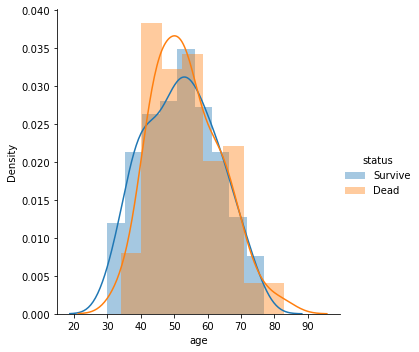

In [198]:
# Univariate analysis - plotting distribution(For age)
sns.FacetGrid(haberman, hue="status", height=5) \
      .map(sns.distplot, "age") \
      .add_legend();
plt.show();

##### Observation: 
    In above plot it is observed that at the age range from 33–75 the status of survival and death is same. So, using this     datapoint we cannot predict anything.

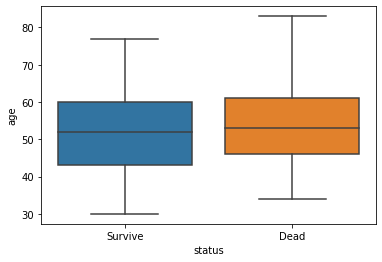

In [199]:
# Boxplot 
sns.boxplot( x='status', y = 'age', data=haberman)
plt.show()

##### Observation :
    1. Survive :
        1. minimum age = 30 
        2. Maximum age = 78
        3. 25%ile of patient,whose age is less than 42-43, survived after surgery.
        4. 75%ile of patient,whose age is greater than 60, survived after surgery.
        5. Average age of people is 52.
    
    2. Dead :
        1. minimum age = 33
        2. Maximum age = 83
        3. 25%ile of patient,whose age is less than 45-46, dead after surgery.
        4. 75%ile of patient,whose age is greater than 61, dead after surgery.
        5. Average age of people is 53.

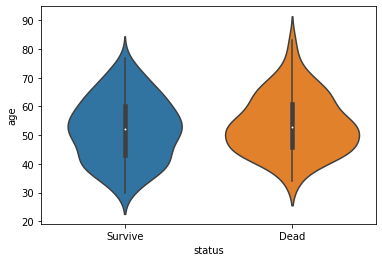

In [200]:
# Violinplot
sns.violinplot(x = 'status' ,y = 'age',data=haberman)
plt.show()

#### Observation :--
    The patient treated age from 50 to 56 have chance to survive. Where as 47 to 52 having chance to death.(Cause of Density of violin plot of status)
    

In [201]:
# 1D scatter plot

haberman_df = haberman.groupby("status")

In [202]:
survive_age = haberman_df["age"].get_group("Survive")
x_survive = survive_age
y_survive = np.zeros_like(survive_age)

In [203]:
dead_age = haberman_df["age"].get_group("Dead")
x_dead = dead_age
y_dead = np.zeros_like(dead_age)

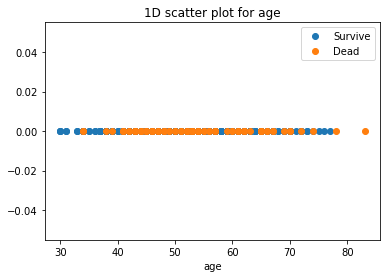

In [204]:
plt.plot(x_survive, y_survive,"o")
plt.plot(x_dead,y_dead,"o")

plt.xlabel("age")
plt.legend(["Survive","Dead"])
plt.title("1D scatter plot for age")
plt.show()

##### Observation :
    Here Survived patient age and Dead patient age are highly overlapping between Age from 39 to 56. So, its crucial to analyse these feature.

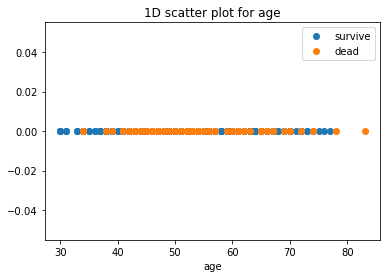

In [205]:
survive = haberman.loc[haberman.status == 'Survive']
dead = haberman.loc[haberman.status == 'Dead']

plt.plot(survive.age,np.zeros_like(survive.age),'o')
plt.plot(dead.age,np.zeros_like(dead.age),'o')

plt.xlabel("age")
plt.legend(["survive","dead"])
plt.title("1D scatter plot for age")
plt.show()

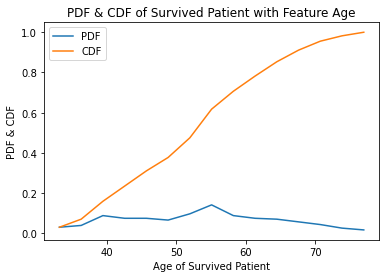

In [206]:
# PDF & CDF of Survived patient using Independent Feature "Age"
counts,bin_edges = np.histogram(survive.age, bins=15,density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel("Age of Survived Patient")
plt.ylabel("PDF & CDF")
plt.legend(["PDF","CDF"])
plt.title("PDF & CDF of Survived Patient with Feature Age")
plt.show()

#### Observation :--- Who Survive;
    1. In PDF,
        -> At the age of 55, most people survived.(18%ile)
    2. In CDF,
        -> 80%ile patient survived in who have less than 62year.

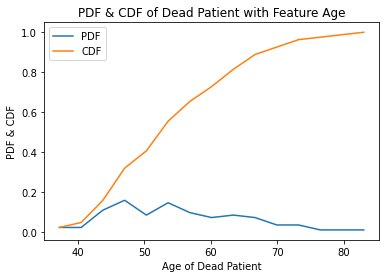

In [207]:
# PDF & CDF of Dead Patient with Feature "Age"
counts, bin_edges = np.histogram(dead.age,bins = 15,density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel("Age of Dead Patient")
plt.ylabel("PDF & CDF")
plt.legend(["PDF","CDF"])
plt.title("PDF & CDF of Dead Patient with Feature Age")
plt.show()

#### Observation :-- For Dead patient;
    1. In PDF,
        -> 17%ile patient died in age of 47 to 48.
        -> At age of 50, patient death rate decrease from 17%ile to 13%ile.
        -> the highest death rate in between 45 to 55.
    2. In CDF, 
        -> 95%ile patient died by the age of 73.



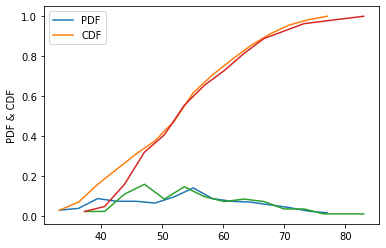

In [208]:
# Age of Survived Patient
counts,bin_edges = np.histogram(survive.age, bins=15,density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# Age of Dead Patient
counts, bin_edges = np.histogram(dead.age,bins = 15,density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.ylabel("PDF & CDF")
plt.legend(["PDF","CDF"])
plt.show()

## 2. Year :

In [209]:
# Univariant Analysis on Feature "Year"
haberman.year.describe()

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: year, dtype: float64

#### Observation :
    1. Total 306 patient data points.
    2. Minimum surgery happen in year,1958.
    3. Maximum surgery happen in year,1969.
    4. 25%-ile surgery happen in year,1960.
    5. 75%-ile surgery happen in year,1965.
    6. Average or mean surgery happen in year,1963.

### Separate year data into Survived and Dead Patient

In [210]:
survive = haberman.year[haberman.status == 'Survive']
survive.describe()

count    225.000000
mean      62.862222
std        3.222915
min       58.000000
25%       60.000000
50%       63.000000
75%       66.000000
max       69.000000
Name: year, dtype: float64

#### Observation : Survived patient of operation year
    1. Total operation_year,who survied is 225 patient.
    2  minimum Operation_year = 1958
    3. Maximum Operation_year = 1969
    4. 25%ile of patient,whose Operation_year is less than 1960, survived after surgery.
    5. 75%ile of patient,whose Operation_year is greater than 1966, survived after surgery.
    6. Average Operaton_year of people is 1963.

In [211]:
dead = haberman.year[haberman.status == 'Dead']
dead.describe()

count    81.000000
mean     62.827160
std       3.342118
min      58.000000
25%      59.000000
50%      63.000000
75%      65.000000
max      69.000000
Name: year, dtype: float64

#### Observation : Dead patient of Operation year
    1. Total Operation_year,who dead is 81 patient.
    2. minimum Operation_year = 1958
    3. Maximum Operation_year = 1969
    4. 25%ile of patient,whose Operation_year is less than 1959, dead after surgery.
    5. 75%ile of patient,whose Operation_year is greater than 1965, dead after surgery.
    6. Average Operation_year of people is 1963.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


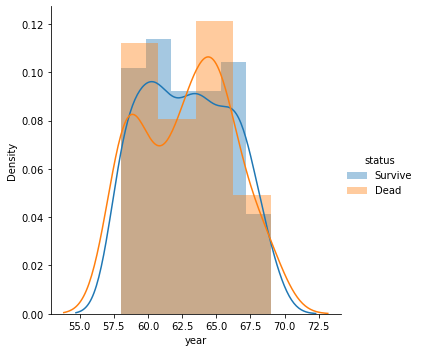

In [212]:
# Univariate analysis - plotting distribution(For year)
sns.FacetGrid(haberman, hue="status", height=5) \
      .map(sns.distplot, "year") \
      .add_legend();
plt.show();

#### Observation :
    we cannot predict anything with these histograms as there is equal number of density in each data point. Even the PDF of both classification overlap on each other.

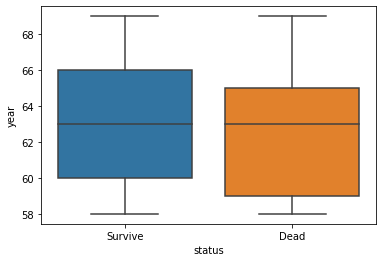

In [213]:
# Box Plot :-
sns.boxplot(x='status',y = 'year',data = haberman)
plt.show()

#### Observation : patient of operation year
    1. Survived patient :
        1. minimum Operation_year = 1958
        2. Maximum Operation_year = 1969
        3. 25%ile of patient,whose Operation_year is less than 1960, survived after surgery.
        4. 75%ile of patient,whose Operation_year is greater than 1966, survived after surgery.
        5. Average Operaton_year of people is 1963.

    2. Dead patient :
        1. minimum Operation_year = 1958
        2. Maximum Operation_year = 1969
        3. 25%ile of patient,whose Operation_year is less than 1959, dead after surgery.
        4. 75%ile of patient,whose Operation_year is greater than 1965, dead after surgery.
        5. Average Operation_year of people is 1963.

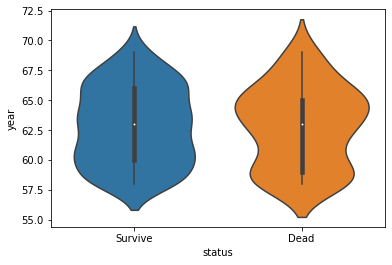

In [214]:
# Violinplot
sns.violinplot(x = 'status' ,y = 'year',data=haberman)
plt.show()

#### Observation: 
The patients treated after 1966 have the slightly higher chance to survive that the rest. The patients treated before 1959 have the slightly lower chance to survive that the rest.

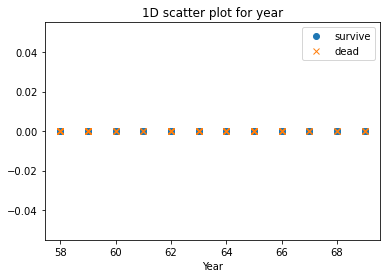

In [215]:
# 1D scatter plot
survive = haberman.loc[haberman.status == 'Survive']
dead = haberman.loc[haberman.status == 'Dead']

plt.plot(survive.year,np.zeros_like(survive.year),'o')
plt.plot(dead.year,np.zeros_like(dead.year),'x')

plt.xlabel("Year")
plt.legend(["survive","dead"])
plt.title("1D scatter plot for year")
plt.show()

#### Observation :
    We cannot predict with these scatter-plot because there is overlapping between survival and death of patient data points.

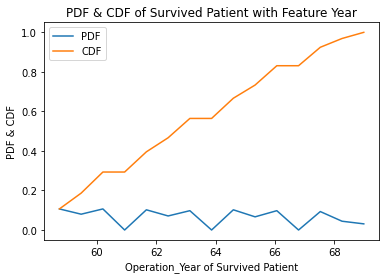

In [216]:
# Operation_Year of Survived Patient
counts,bin_edges = np.histogram(survive.year, bins=15,density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel("Operation_Year of Survived Patient")
plt.ylabel("PDF & CDF")
plt.legend(["PDF","CDF"])
plt.title("PDF & CDF of Survived Patient with Feature Year")
plt.show()

### Observation :---
    1. 


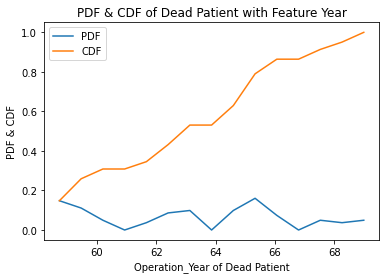

In [217]:
# Operation_Year of Dead Patient
counts,bin_edges = np.histogram(dead.year, bins=15,density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel("Operation_Year of Dead Patient")
plt.ylabel("PDF & CDF")
plt.legend(["PDF","CDF"])
plt.title("PDF & CDF of Dead Patient with Feature Year")
plt.show()

### Observation :--- WHO DEAD;
    1. In PDF,
        -> the highest death happen in year of 1965.
    2. In CDF, 
        -> 80%ile death happen in less than 1965 year.

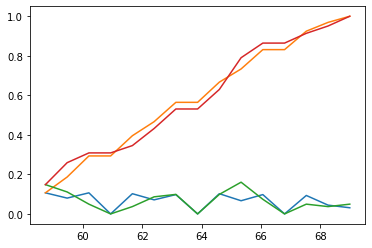

In [218]:
# Operation_Year of Survived Patient
counts,bin_edges = np.histogram(survive.year, bins=15,density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# Operation_Year of Dead Patient
counts,bin_edges = np.histogram(dead.year, bins=15,density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

## 3. Nodes

In [219]:
# Univariant Analysis on Feature "Year"
haberman.nodes.describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

###### Observation :
    1. Total 306 patient data points.
    2. Minimum nodes in patient is 0.
    3. Maximum nodes in patient is 52.
    4. 25%-ile patient having zero nodes.
    5. 75%-ile patient having 4 nodes.
    6. 50%-ile patient having 1 node.
    7. Average patient have 4 nodes.

### Saperating feature (nodes) data into Survival and Dead data

In [220]:
survive = haberman.nodes[haberman.status == 'Survive']
survive.describe()

count    225.000000
mean       2.791111
std        5.870318
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       46.000000
Name: nodes, dtype: float64

###### Observation : Survived patient having nodes :
    1. Total 225 patient survived.
    2. Minimum nodes in patient is 0.
    3. Maximum nodes in patient is 46.
    4. 25%-ile patient having zero nodes.
    5. 75%-ile patient having 3 nodes.
    6. 50%-ile patient having 0 node.
    7. Average patient have 2 nodes.

In [221]:
dead = haberman.nodes[haberman.status == 'Dead']
dead.describe()

count    81.000000
mean      7.456790
std       9.185654
min       0.000000
25%       1.000000
50%       4.000000
75%      11.000000
max      52.000000
Name: nodes, dtype: float64

###### Observation : Dead patient having nodes :
    1. Total 81 patient dead.
    2. Minimum nodes in patient is 0.
    3. Maximum nodes in patient is 52.
    4. 25%-ile patient having 1 node.
    5. 75%-ile patient having 11 nodes.
    6. 50%-ile patient having 4 nodes.
    7. Average patient have 7 nodes.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


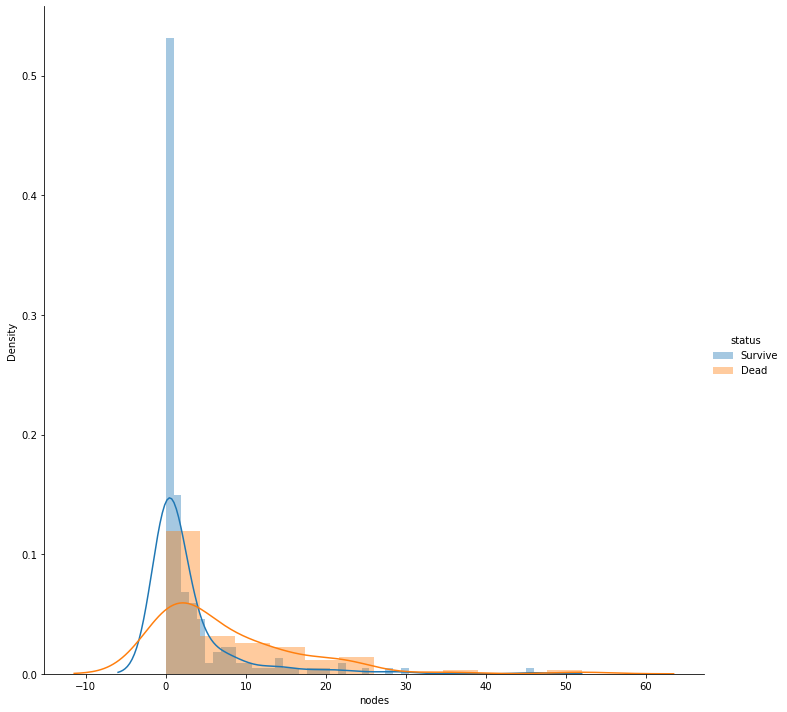

In [222]:
# Univariate analysis - plotting distribution(For age)
sns.FacetGrid(haberman, hue="status", height=10) \
      .map(sns.distplot, "nodes") \
      .add_legend();
plt.show();

#### Observation :
    -> people survive if they have less nodes detected but its still hard to classify.
    -> if patient having less than or euqal to zero nodes, patient will survive long.
    -> if patient having nodes between 0 to 3, patient survival chance increase.
    -> if patient having greater or equal to 4 nodes, patient survival chance decrease.
### But still we cannot define what percentage to patient will  actually short survive or long survive.

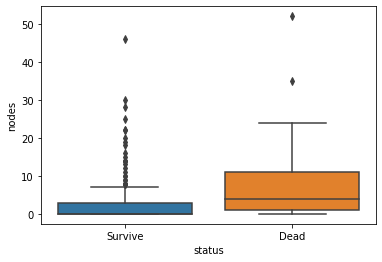

In [223]:
# Box Plot :-
sns.boxplot(x='status',y = 'nodes',data = haberman)
plt.show()

##### Observation :- 
    -> Maximum people having less than 5 nodes have a higher chance of survival.



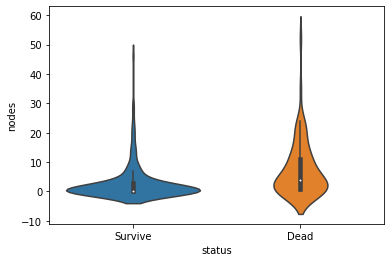

In [224]:
# Violinplot
sns.violinplot(x = 'status' ,y = 'nodes',data=haberman)
plt.show()

##### Observation :-
    -> Density of long survived patient,For Survive, is more near the 0 nodes and whiskers in range 0-7.
    -> Density of short survived patient,For Dead, is from 0-20 and threshold 0-12.

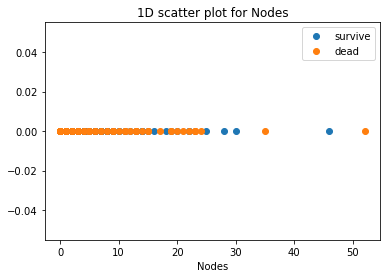

In [225]:
# 1D scatter plot
survive = haberman.loc[haberman.status == 'Survive']
dead = haberman.loc[haberman.status == 'Dead']

plt.plot(survive.nodes,np.zeros_like(survive.nodes),'o')
plt.plot(dead.nodes,np.zeros_like(dead.nodes),'o')

plt.xlabel("Nodes")
plt.legend(["survive","dead"])
plt.title("1D scatter plot for Nodes")
plt.show()

#### Observation:--
    Here nodes of dead patient is overlapping nodes of survival, So we could not predict any Survival status.

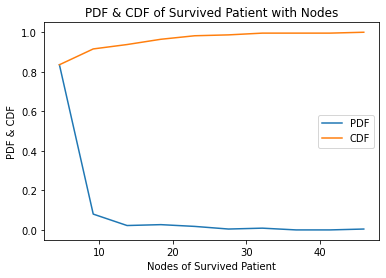

In [226]:
# PDF & CDF Of Survived status of patient
counts, bin_edges = np.histogram(survive.nodes,bins = 10,density =True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.xlabel("Nodes of Survived Patient")
plt.ylabel("PDF & CDF")
plt.legend(["PDF","CDF"])
plt.title("PDF & CDF of Survived Patient with Nodes")
plt.show()

### Observation :---
    1. In PDF, who survived
        -> less than 10% patient have less than 8 nodes.
        -> less than 5% patient have less than 13 nodes.
    2. In CDF,who survived
        -> 90%ile patient have less than 9 nodes.

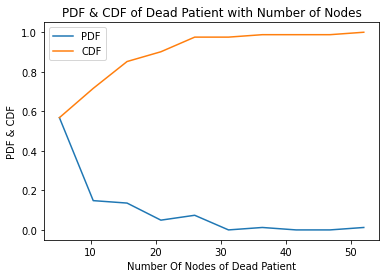

In [227]:
# PDF & CDF Of Death status of patient
counts, bin_edges = np.histogram(dead.nodes, bins = 10,density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel("Number Of Nodes of Dead Patient")
plt.ylabel("PDF & CDF")
plt.legend(["PDF","CDF"])
plt.title("PDF & CDF of Dead Patient with Number of Nodes")
plt.show()

#### Observation :---
    1. In PDF,Who Dead
        -> 18%ile patient have less than 10 nodes.
        -> 10%ile patient have less than 21 nodes.
    2. In CDf, who Dead, 84%ile having less than 15 nodes. 

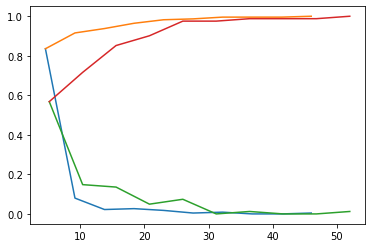

In [228]:
# PDF & CDF Of Survived status of patient
counts, bin_edges = np.histogram(survive.nodes,bins = 10,density =True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# PDF & CDF Of Death status of patient
counts, bin_edges = np.histogram(dead.nodes, bins = 10,density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

# EDA : Multivariant Analysis

In [229]:
haberman.corr()

,age,year,nodes
age,1.000000,0.089529,-0.063176
year,0.089529,1.000000,-0.003764
nodes,-0.063176,-0.003764,1.000000


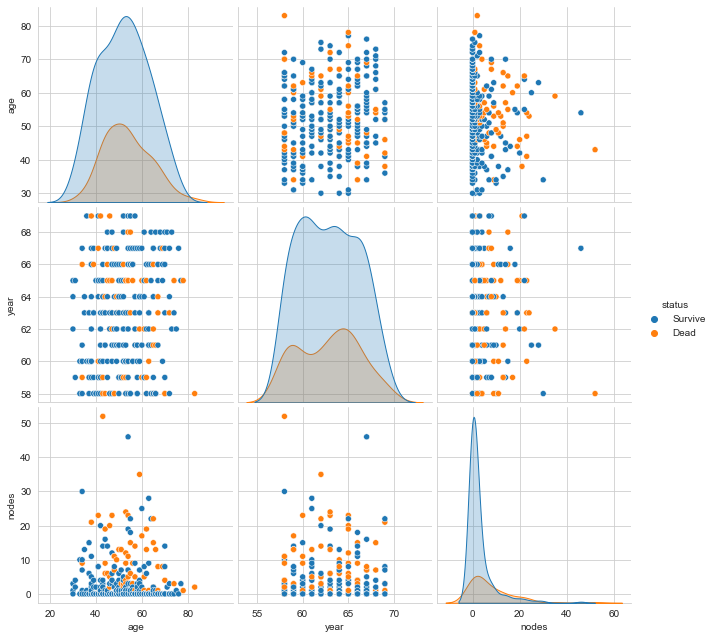

In [239]:
# 1. 3D scatter plot 
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",height=3)
plt.show()

## Observation:---
    1. In Year on X-axis and Age on Y-axis and vice versa (PLOT 2 or PLOT 4):--
            In this plot the data is mostly overlapping on each other data so we cannot perdict.
            
    2. In Nodes on X-axis and Age on Y-axis and vice versa (PLOT 3 or PLOT 7) :--
        In this plot the overlap of points are there but still it is better than all other plots comparatively.
        
    3. In Nodes on X-axis and Year on Y-axis and vice versa (PLOT 6 or PLOT 8) :--
        In this plot overlapping of points seems to be more in this plot comparative to other.

# Conclusion :-----

1. So we can finally conclude that we can analyse the haberman data set by using various techniques and diagnosis of cancer patient can be done by analysis the auxiliary nodes from this visualisation of data.
2. People less than 35 years have more chance of survival. But people’s age and operation year is not the only factor to decide.
